In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso,LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC,SVR
from tqdm.notebook import tqdm as tqdm
from sklearn import decomposition
import seaborn as sns
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from pandas.plotting import scatter_matrix
from sklearn import datasets
plt.style.use("bmh")

# Students Performance Analysis

### Q.1 

Read the attached "students.csv" file to a DataFrame.

In [2]:
data = pd.read_csv("students.csv")
data.head()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


### Q.2

Print the features name and type.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   StageID                   480 non-null    object
 3   GradeID                   480 non-null    object
 4   SectionID                 480 non-null    object
 5   Topic                     480 non-null    object
 6   Semester                  480 non-null    object
 7   Relation                  480 non-null    object
 8   raisedhands               480 non-null    int64 
 9   VisITedResources          480 non-null    int64 
 10  AnnouncementsView         480 non-null    int64 
 11  Discussion                480 non-null    int64 
 12  ParentAnsweringSurvey     480 non-null    object
 13  ParentschoolSatisfaction  480 non-null    object
 14  StudentAbsenceDays        

### Q.3

#### 3.1

Perform feature encoding on the categorical features. <br/>
For each categorical feature, create LabelEncoder and transform its values.

In [4]:
categorical_features = data.select_dtypes(include=["object"]).columns
categorical_features

Index(['gender', 'NationalITy', 'StageID', 'GradeID', 'SectionID', 'Topic',
       'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

In [5]:
le_map = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    le_map[col] = le

In [13]:
le_map["Semester"].classes_

array(['F', 'S'], dtype=object)

In [15]:
pd.Series(le_map["NationalITy"].classes_)

0           Egypt
1            Iran
2            Iraq
3          Jordan
4              KW
5           Lybia
6         Morocco
7       Palestine
8     SaudiArabia
9           Syria
10          Tunis
11            USA
12        lebanon
13       venzuela
dtype: object

#### 3.2

Print the mapping values of "NationalITy" feature.

In [22]:
data.head()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,2,1,0,7,0,15,16,2,20,1,1,1,2
1,1,4,2,1,0,7,0,20,20,3,25,1,1,1,2
2,1,4,2,1,0,7,0,10,7,0,30,0,0,0,1
3,1,4,2,1,0,7,0,30,25,5,35,0,0,0,1
4,1,4,2,1,0,7,0,40,50,12,50,0,0,0,2


In [17]:
X = data.drop(columns=["Class"]).copy()
y = data["Class"].copy()

### Q.4

#### 4.1
Use the method 'evaluate_RF' we have implemented in ensemble learning practice and evaluate it on the students dataset.

In [16]:
def evaluate_RF(X, y, n_estimators, max_depth=[2,8,16,32]):
    res = {}
    for md in max_depth:
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=md, random_state=1)
        res['rf_'+str(md)] = np.mean(cross_val_score(rf,X,y,cv=3,scoring="accuracy"))
    return res

In [18]:
evaluate_RF(X, y, 200)

{'rf_2': 0.65, 'rf_8': 0.69375, 'rf_16': 0.68125, 'rf_32': 0.68125}

Trees: 200, depth: 8

#### 4.2

Use the hyperparameters discovered in 4.1 and display the importance of each feature.

In [19]:
RF = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=1)
RF.fit(X,y)
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": RF.feature_importances_ * 100
})
importances = importances.sort_values("Importance", ascending=False)
importances

,Feature,Importance
9,VisITedResources,18.788367
8,raisedhands,16.656039
14,StudentAbsenceDays,13.859538
10,AnnouncementsView,12.040713
11,Discussion,8.735933
7,Relation,4.901487
5,Topic,4.285209
1,NationalITy,4.035904
12,ParentAnsweringSurvey,3.930613
3,GradeID,3.382052


#### 4.3

Drop the least important feature.

In [21]:
X.drop(columns=["Semester"], inplace=True)
X.head()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1,4,2,1,0,7,0,15,16,2,20,1,1,1
1,1,4,2,1,0,7,0,20,20,3,25,1,1,1
2,1,4,2,1,0,7,0,10,7,0,30,0,0,0
3,1,4,2,1,0,7,0,30,25,5,35,0,0,0
4,1,4,2,1,0,7,0,40,50,12,50,0,0,0


#### 4.4 

Use <strong>Automated Feature Selection (AFS)</strong> based on GradientBoostingClassifier and find the most important features using the <strong>median</strong> threshold.

In [ ]:
50,50 = 50
0,100 = 50
25,75 = 50


In [23]:
select = SelectFromModel(GradientBoostingClassifier(n_estimators=200, random_state=42542), threshold="median")
select.fit(X, y)
mask = select.get_support()
result = pd.DataFrame({
    "Features": X.columns,
    "Selected": mask
})
result

,Features,Selected
0,gender,False
1,NationalITy,False
2,StageID,False
3,GradeID,False
4,SectionID,False
5,Topic,False
6,Relation,True
7,raisedhands,True
8,VisITedResources,True
9,AnnouncementsView,True


#### 4.5

Create the "selected_features" list with features that satisfy "Selected = True".

In [27]:
selected_features = result[result["Selected"] == True]["Features"].values
selected_features

array(['Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion', 'ParentAnsweringSurvey', 'StudentAbsenceDays'],
      dtype=object)

### Q.5

#### 5.1

Create new DataFrame using the selected features, and split to (X,y).

In [30]:
new_df = X[selected_features].copy()
new_df.head()

,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,StudentAbsenceDays
0,0,15,16,2,20,1,1
1,0,20,20,3,25,1,1
2,0,10,7,0,30,0,0
3,0,30,25,5,35,0,0
4,0,40,50,12,50,0,0


In [31]:
y.head()

0    2
1    2
2    1
3    1
4    2
Name: Class, dtype: int64

#### 5.2

Implement the function  `search_for_hyperparameters(X, y, model_name, model, param_grid)`

That gets as input:
* X - dataset
* y - target variable
* model_name - string
* model - Object
* param_grid

and perform GridSearchCV


In [32]:
def search_for_hyperparameters(X, y, model_name, model, param_grid):
    pipe = Pipeline([(model_name, model)])
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
    grid.fit(X, y)
    print("Test set score: {:.2f}".format(grid.score(X, y))) # grade for training !!!!!!
    print("Best parameters: {}".format(grid.best_params_))

#### 5.3

Test your method on: AdaBoostClassifier, RandomForestClassifier, SVC

* AdaBoostClassifier: learning_rate
* RandomForestClassifier: n_estimators, max_depth
* SVM: C, gamma

In [33]:
ab_grid = {
    "ab__learning_rate": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
}
search_for_hyperparameters(new_df, y, "ab", AdaBoostClassifier(), ab_grid)

Test set score: 0.75
Best parameters: {'ab__learning_rate': 0.1}


In [34]:
rf_grid = {
    "rf__n_estimators": [50, 100, 150, 200, 250, 300], 
    "rf__max_depth": [2,4,8,16,32]
}
search_for_hyperparameters(new_df, y, "rf", RandomForestClassifier(), rf_grid)

Test set score: 0.84
Best parameters: {'rf__max_depth': 4, 'rf__n_estimators': 200}


In [35]:
svm_grid = {
    "svm__C": [0.0001, 0.001, 0.01, 0.1, 1, 10],
    "svm__gamma": [0.0001, 0.001, 0.01, 0.1, 1, 10]
}
search_for_hyperparameters(new_df, y, "svm", SVC(), svm_grid)

Test set score: 0.75
Best parameters: {'svm__C': 1, 'svm__gamma': 0.001}


### Q.6

Use the new dataset and display the plots of PCA, tSNE, and MDS.

In [43]:
def plot_PCA(data, labels):
    pca = decomposition.PCA(n_components = 2)
    pca_data = pca.fit_transform(data)
    pca_data = np.vstack((pca_data.T, labels)).T
    df = pd.DataFrame(data=pca_data, columns=("dim1", "dim2", "Label"))
    sns.FacetGrid(df, hue="Label", height=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
    plt.title("PCA")
    plt.show()
    
def plot_tSNE(data, labels, perplexity=[5,20,30,50]):
    kl_divergence_iris = []
    fig, ax = plt.subplots(1, 4, figsize=(40, 8))
    for idx, p in enumerate(perplexity):
        tsne = TSNE(n_components=2, random_state=0, perplexity=p)
        tsne_data = tsne.fit_transform(data)
        kl_divergence_iris.append(tsne.kl_divergence_)
        tsne_data = np.vstack((tsne_data.T, labels)).T
        df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "Label"))
        sns.scatterplot(x=df['dim1'], y=df['dim2'], hue=df["Label"], ax=ax[idx], s=100,palette='colorblind').set_title("t-SNE with perplexity="+str(p))
    plt.show()
    
def plot_MDS(data, labels):
    mds = MDS(n_components=2)
    mds_data = mds.fit_transform(data)
    mds_data_iris = np.vstack((mds_data.T, labels)).T
    df = pd.DataFrame(data=mds_data_iris, columns=("dim1", "dim2", "Label"))
    sns.FacetGrid(df, hue="Label", height=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
    plt.title("MDS with final stress=" + str(mds.stress_))
    plt.show()

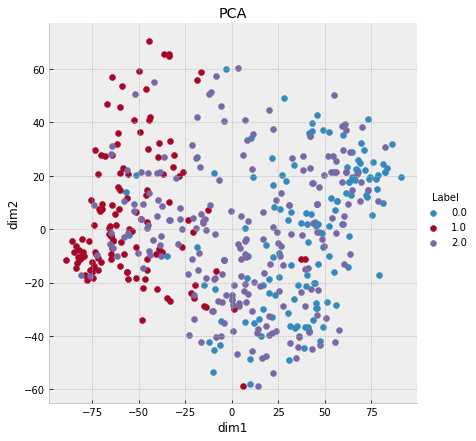

In [44]:
plot_PCA(new_df, y)

In [46]:
pd.Series(le_map["Class"].classes_)

0    H
1    L
2    M
dtype: object

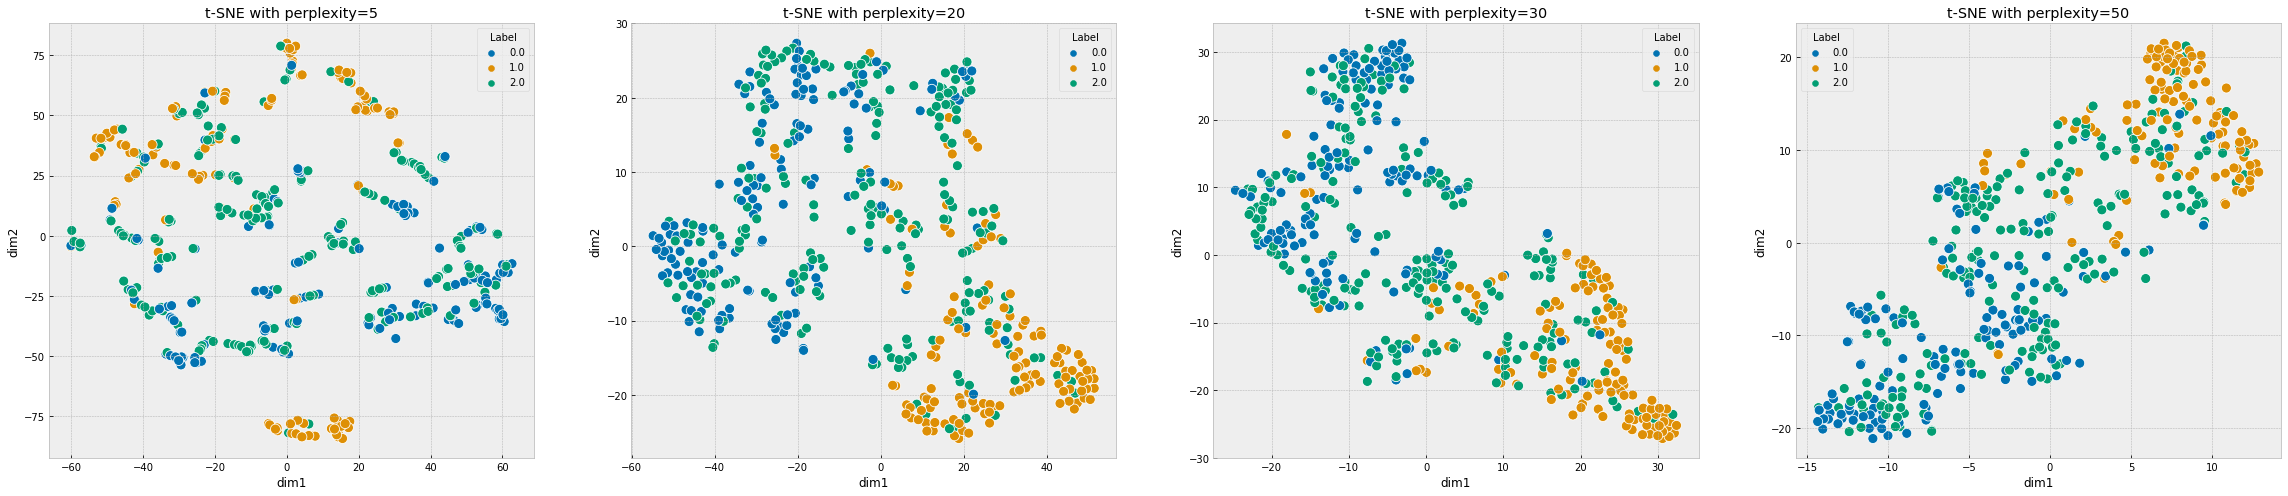

In [47]:
plot_tSNE(new_df, y)

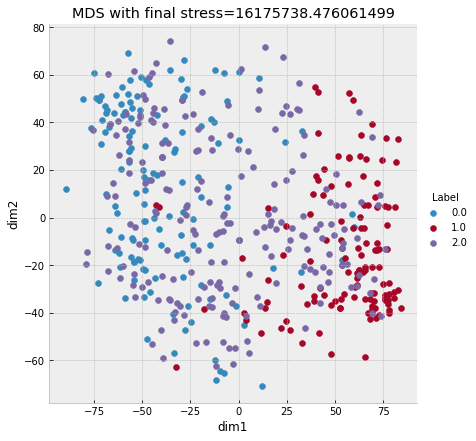

In [48]:
plot_MDS(new_df, y)

### Q.7

Choose one model (based on the result of this practice) and evaulate it on the students dataset. <br/>

Compare your result based on cross-validation-score using cv=5 and cv=10.

In [36]:
model = RandomForestClassifier(n_estimators=200, max_depth=4)
cross_val_score(model, new_df, y, cv=5)

array([0.66666667, 0.71875   , 0.71875   , 0.77083333, 0.69791667])

In [37]:
cross_val_score(model, new_df, y, cv=5).mean()

0.7291666666666666

In [42]:
cross_val_score(model, new_df, y, cv=10).mean()

0.7229166666666667

In [39]:
cross_val_score(model, new_df, y, cv=15).mean()

0.7270833333333333

In [40]:
cross_val_score(model, new_df, y, cv=30).mean()

0.7395833333333334

### Q.8

Build a procedure that allow you to predict future data based on your model.

In [49]:
model = RandomForestClassifier(n_estimators=200, max_depth=4)
model.fit(new_df,y)

RandomForestClassifier(max_depth=4, n_estimators=200)

In [51]:
new_df

,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,StudentAbsenceDays
0,0,15,16,2,20,1,1
1,0,20,20,3,25,1,1
2,0,10,7,0,30,0,0
3,0,30,25,5,35,0,0
4,0,40,50,12,50,0,0
...,...,...,...,...,...,...,...
475,0,5,4,5,8,0,0
476,0,50,77,14,28,0,1
477,0,55,74,25,29,0,1
478,0,30,17,14,57,0,0


In [59]:
y

0      2
1      2
2      1
3      1
4      2
      ..
475    1
476    2
477    2
478    1
479    1
Name: Class, Length: 480, dtype: int64

In [58]:
le_map["Relation"].transform(["Father"])[0]

0

In [60]:
def predict_student_performance(le_map, model, relation, hands, resources, anno, discussion, parents, absence):
    to_predict = [
        le_map["Relation"].transform([relation])[0],
        hands,
        resources,
        anno,
        discussion,
        le_map["ParentAnsweringSurvey"].transform([parents])[0],
        le_map["StudentAbsenceDays"].transform([absence])[0],
    ]
    predicted_value = model.predict([to_predict])[0]
    return le_map["Class"].inverse_transform([predicted_value])

In [61]:
predict_student_performance(le_map, model, "Father", 17, 22, 3, 45, "Yes", "Above-7")

array(['L'], dtype=object)

In [62]:
predict_student_performance(le_map, model, "Mum", 50, 40, 1, 30, "Yes", "Above-7")

array(['M'], dtype=object)

In [63]:
predict_student_performance(le_map, model, "Mum", 120, 100, 5, 100, "Yes", "Under-7")

array(['H'], dtype=object)